In [3]:
#from frequency_domain_reconstruction import freq_Domain
import matplotlib
import matplotlib.pyplot as plt
from scipy import fftpack
import pandas as pd
import numpy as np

In [2]:
from scipy import fftpack
import sys
sys.path.insert(0, 'C:\\Users\gcram\Documents\GitHub\TCC\TCC\\')
from utils import dataHandler

In [5]:
dataH = dataHandler()
dataH.load_data(dataset_name ='MHEALTH')
dataH.apply_missing('b','0.2')
print(dataH.dataX.shape)
dataH.impute('frequency')

(2555, 250, 3)


### Capturando classes

In [4]:
%matplotlib inline
#fd.plot_reconstruction(0)
classes = pd.unique(dataH.dataY)
classes_idx = []
for c in classes:
    classes_idx.append(np.where(dataH.dataY==c)[0][0])

NameError: name 'dataH' is not defined

In [19]:
i = classes_idx[1]
freq = 50
x_true = dataH.dataY[i,:,0]
x_missing =  0,
[i]
x_f_true = fftpack.rfft(x_true)
x_f_missing = fftpack.rfft(x_missing)
x_f_true2 = fftpack.dct(x_true)
x_f_missing2 = fftpack.dct(x_missing)


#### Plotting data and data_missing

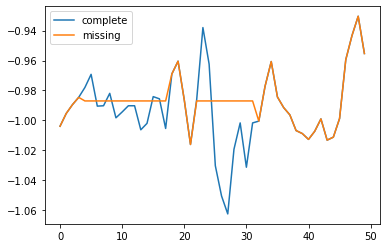

In [18]:
plt.plot(x_true, label = 'complete')
plt.plot(x_missing, label = 'missing')
plt.legend()
plt.show()


### Ploting in Frequency domain

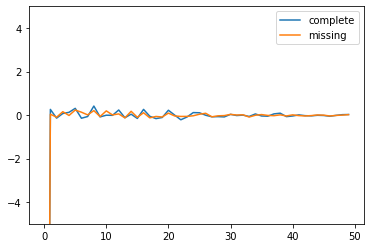

In [31]:
plt.plot(x_f_true,label = 'complete')
plt.plot(x_f_missing,label = 'missing')
plt.ylim([-5,5])
plt.legend()
plt.show()

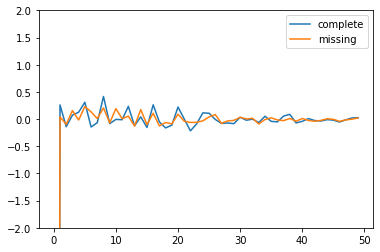

In [30]:
y_lim = 2
plt.plot(x_f_true,label = 'complete')
plt.plot(x_f_missing,label = 'missing')
plt.ylim([-y_lim,y_lim])
plt.legend()
plt.show()

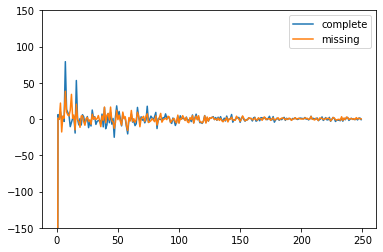

In [75]:
plt.plot(x_f_true,label = 'complete')
plt.plot(x_f_missing,label = 'missing')
plt.ylim([-150,150])
plt.legend()
plt.show()

### Data Histogram (first _X_ frequency):

(-50, 50)

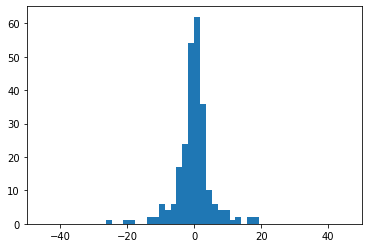

In [76]:
nfreq = 50
_ = plt.hist(x_f_true, bins=500)
plt.xlim([-nfreq,nfreq])

### Fixing missing data with true frequency 

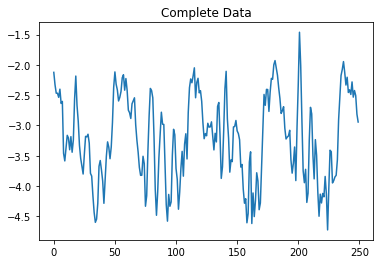

In [42]:
plt.plot(fftpack.irfft(x_f_true))
plt.title('Complete Data')
plt.show()

Text(0.5, 1.0, 'Fixed missing data')

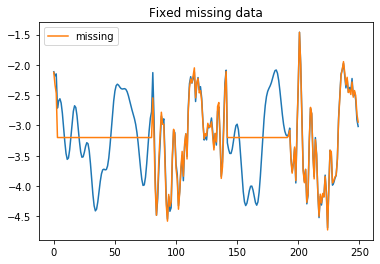

In [46]:
x_f_missing[:nfreq] = x_f_true[:nfreq]
plt.plot(fftpack.irfft(x_f_missing))
plt.plot(x_missing, label = 'missing')
plt.legend()
plt.title('Fixed missing data')

### Fixing missing data with own frequency

In [28]:
dataH = dataHandler()
dataH.load_data(dataset_name ='MHEALTH')
dataH.apply_missing('b','0.3')


In [29]:
idx_missing = np.argwhere(np.isnan(dataH.dataXmissing[0,:,0]))
idx_missing = idx_missing.flatten()
idx_notM = list(set(range(250)) - set(idx_missing))

In [44]:
freq = fftpack.rfft(dataH.dataX[0,idx_notM,0])

In [50]:
req = fftpack.irfft(freq,n = len(idx_missing))

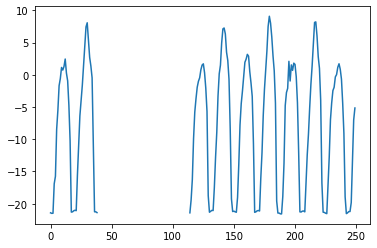

In [52]:
plt.plot(dataH.dataXmissing[0,:,0])

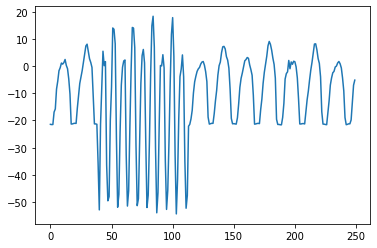

In [53]:
dataH.dataXmissing[0,idx_missing,0] = req
plt.plot(dataH.dataXmissing[0,:,0])

In [6]:
%matplotlib inline
#fd.plot_reconstruction(0)
classes = pd.unique(dataH.dataY)
classes_idx = []
for c in classes:
    classes_idx.append(np.where(dataH.dataY==c)[0][0])

In [24]:
classe = 0

x_true = dataH.dataX[classes_idx[classe],:,0]
x_missing = dataH.dataXmissing[classes_idx[classe],:,0]

##### Good example:

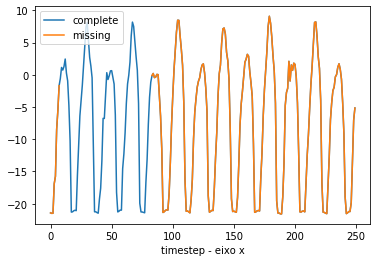

In [25]:
plt.plot(x_true, label = 'complete')
plt.plot(x_missing, label = 'missing')
plt.title('')
plt.xlabel('timestep - eixo x')
plt.legend()
plt.show()

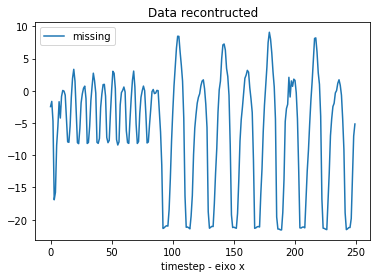

In [27]:
#dataH.impute('frequency')
x_rec = dataH.dataXmissing[classes_idx[classe],:,0]
plt.plot(x_rec, label = 'missing')
plt.title('Data recontructed')
plt.xlabel('timestep - eixo x')
plt.legend()
plt.show()

In [65]:
i = classes_idx[1]
x_missing = fd_2.data_x_missing[i]
x_true = fd_2.data_x[i]

idx_miss = np.isnan(x_missing)
idx_miss=np.argwhere(idx_miss)
idx_miss = idx_miss.reshape(len(idx_miss))
idx = list(set(range(len(x_missing))) - set(idx_miss))

x_cut =  x_missing[idx].copy()
freqs= fftpack.rfft(x_cut)

x_hat = x_missing.copy()
x_hat[idx_miss] = fftpack.irfft(freqs,n = len(idx_miss))

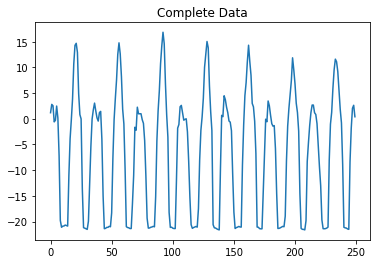

In [66]:
plt.plot(x_true)
plt.title('Complete Data')
plt.show()

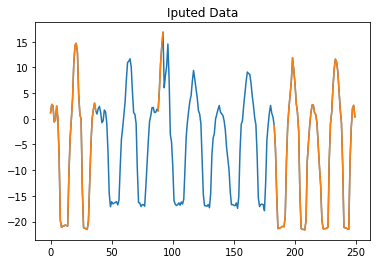

In [67]:
plt.plot(x_hat)
plt.plot(x_missing)
plt.title('Iputed Data')
plt.show()